Regression Problem

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50,n_features=5)

In [24]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,-1.755068,-1.995909,0.944227,0.966262,1.088278
1,0.227631,-0.757288,-0.781177,0.520124,0.886445
2,-0.174799,0.568340,-0.802094,-0.893845,-0.266130
3,-0.478631,0.752293,-1.054958,1.564435,1.783070
4,-0.654176,-0.027470,-0.600879,-0.347900,0.954713


In [25]:
y[:5]

array([-52.55958528,  -3.9774323 , -22.40679542, 220.21315535,
        21.16721046])

In [26]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [27]:
fs = SelectKBest(score_func=mutual_info_regression, k=5)
fs.fit(x,y)

,score_func,<function mut...00269B67600E0>
,k,5


In [28]:
fs.scores_

array([0.        , 0.54856617, 0.06180671, 0.24950762, 0.11416147])

In [29]:
mi_score = pd.Series(fs.scores_,index=x.columns)
mi_score

0    0.000000
1    0.548566
2    0.061807
3    0.249508
4    0.114161
dtype: float64

<Axes: >

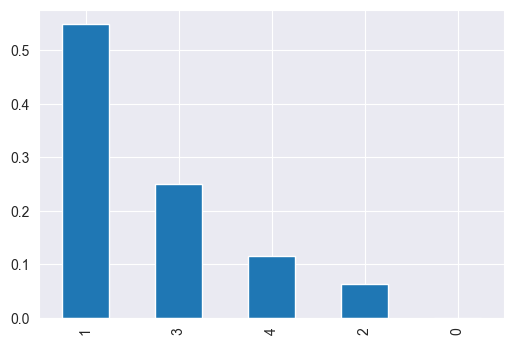

In [30]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [31]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [32]:
x_selected.head()

,0,1,2,3,4
0,-1.755068,-1.995909,0.944227,0.966262,1.088278
1,0.227631,-0.757288,-0.781177,0.520124,0.886445
2,-0.174799,0.568340,-0.802094,-0.893845,-0.266130
3,-0.478631,0.752293,-1.054958,1.564435,1.783070
4,-0.654176,-0.027470,-0.600879,-0.347900,0.954713


Classification Problem

In [33]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [34]:
x,y = make_classification(n_samples=50,n_features=5, n_informative=2)
x = pd.DataFrame(x)

In [35]:
x.head()

,0,1,2,3,4
0,0.433267,-0.056519,-1.756320,0.455614,-1.496008
1,1.028050,1.372311,1.477356,1.687446,-1.220638
2,0.229927,1.703173,-1.178564,0.215305,-0.895620
3,1.392317,0.145183,2.254222,2.312576,-1.548591
4,0.748753,-0.369373,-1.679194,0.933037,-2.025837


In [36]:
y[:5]

array([0, 0, 0, 0, 0])

<Axes: >

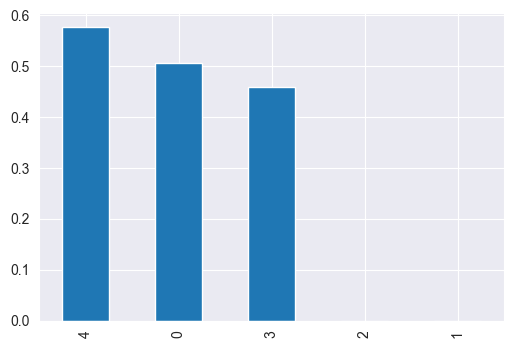

In [37]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(x,y)
mi_score = pd.Series(fs.scores_,index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [38]:
selected_x = fs.fit_transform(x,y)
selected_x = pd.DataFrame(selected_x)

In [39]:
x.head()

,0,1,2,3,4
0,0.433267,-0.056519,-1.756320,0.455614,-1.496008
1,1.028050,1.372311,1.477356,1.687446,-1.220638
2,0.229927,1.703173,-1.178564,0.215305,-0.895620
3,1.392317,0.145183,2.254222,2.312576,-1.548591
4,0.748753,-0.369373,-1.679194,0.933037,-2.025837


In [40]:
selected_x.head()

,0,1,2
0,0.433267,0.455614,-1.496008
1,1.028050,1.687446,-1.220638
2,0.229927,0.215305,-0.895620
3,1.392317,2.312576,-1.548591
4,0.748753,0.933037,-2.025837
